# Heat
Tektonik olayların yakıtı dünyanın iç ısısıdır.

## Isı Akısı
The *rate* at which heat is conducted through a solid is proportional to the temperature gradient
$$Q=-\kappa\nabla u$$
$\kappa$, ısı iletim katsayısı (thermal conductivity)  
Q, ısı akısı (heat flow)  
u, sıcaklık

## Isı denklemi [(url)](https://web.stanford.edu/class/math220b/handouts/heateqn.pdf)
Let $u(x, t)$ be the temperature at point $x$, time $t$, and let $Q(t)$ be the total amount of heat (in calories) contained in a volume $V$. Let $c$ be the specific heat of the material and $\rho$ its density.

$$Q(t) = \int_V c\rho u(x,t) dx$$

The change in heat is given by

$$\frac{dQ}{dt}=\int_V c\rho u_t(x,t)dx$$

Fourier’s Law says that heat flows from hot to cold regions at a rate  $\kappa > 0$ proportional to the temperature gradient. The only way heat will leave $V$ is through the boundary. That is

$$\frac{dQ}{dt}=\int_{\partial V} \kappa\nabla u \cdot ndS$$

where $\partial V$ is the boundary of $V$, $n$ is the outward unit normal vector to $\partial V$ and $dS$ is the surface measure over $\partial V$. Therefore, we have

$$\int_V c\rho u_t(x,t)dx = \int_{\partial V} \kappa\nabla u \cdot ndS$$

Applying the Divergence Theorem

$$\int_V c\rho u_t(x,t)dx = \int_V \nabla \cdot (\kappa\nabla u) dx$$

This leads to the PDE

$$c\rho u_t(x,t)= \kappa\nabla^2 u$$ 

or, in a concise representation, where $k=\kappa/{\rho c}$

$$u_t = k\nabla^2 u$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.pyplot import figure
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

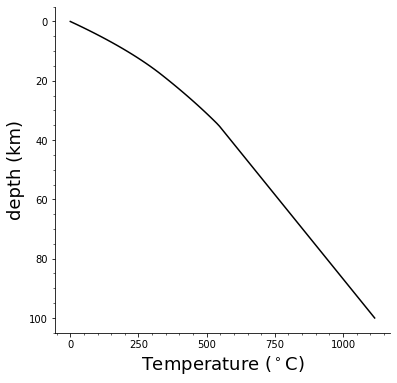

In [2]:
# A representative geotherm
u = genfromtxt('Temperatures.dat', delimiter=',', comments="#" ,skip_header=1, dtype=float)

pltfig, ax = plt.subplots(figsize=(6,6))
ax.plot(u[:,1], u[:,0],'k-', label="geotherm")

#reverse y-axis
ax.set_ylim(ax.get_ylim()[::-1])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_major_locator(MultipleLocator(250))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.xlabel('Temperature ($^\circ$C)', fontsize=18)
plt.ylabel('depth (km)', fontsize=18)

plt.rc('font', size=16)

Let's reproduce Figure 7.3 in Fowler in order to study the effect of various parameters on the equilibrium geotherm. The equilibrium geotherm is given by

$$T(z)=-\frac{A}{2k}z^2+\frac{Q_d+Ad}{k}z$$

In [84]:
z=np.arange(0,50000,1000)

def geotherm1(z):
    A=1.25e-6 # 
    k=2.5 # k for rock varies between 1.7-3.3 W/m/C
    Q0=60e-3
    return -A/(2*k)*z**2+Q0/k*z

def geotherm2(z,k,A,Qd):
    #A=1.25# in 10-6 W m^-3
    #k=2.5 # k for rock varies between 1.7-3.3 W/m/C
    #Qd=21e-3
    d=50000
    return -A*(1e-6)/(2*k)*z**2+(Qd+A*(1e-6)*d)/k*z

def show_g1(k,A,Qd):
    T2=geotherm2(z,k,A,Qd)
    pltfig, ax = plt.subplots(figsize=(8,4))
    ax.plot(T2, z/1000, 'k-', label="geotherm")
    ax.set_ylim(ax.get_ylim()[::-1])

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_major_locator(MultipleLocator(500))
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(50))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))

    plt.xlabel('Temperature ($^\circ$C)', fontsize=18)
    plt.ylabel('depth (km)', fontsize=18)
    ax.set_xlim([0,2000])

In [85]:
interact(show_g1,k=(1.7,3.3,.1), A=(1.25,2.5,0.25), Qd=(10.5e-3,42e-3,10e-3))

interactive(children=(FloatSlider(value=2.5, description='k', max=3.3, min=1.7), FloatSlider(value=1.75, descr…

<function __main__.show_g1(k, A, Qd)>

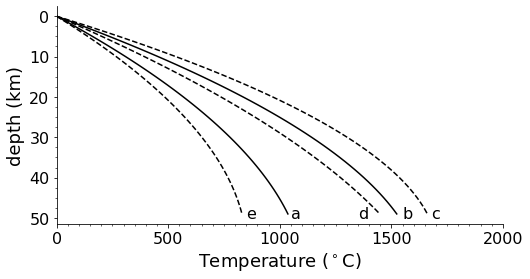

In [78]:
# Reproduce Fig 7.3

pltfig, ax = plt.subplots(figsize=(8,4))
ax.plot(geotherm2(z,2.5,1.25,21e-3), z/1000., 'k-', label="geotherm")
ax.plot(geotherm2(z,1.7,1.25,21e-3), z/1000., 'k-', label="geotherm")
ax.plot(geotherm2(z,2.5,2.5,21e-3), z/1000., 'k--', label="geotherm")
ax.plot(geotherm2(z,2.5,1.25,42e-3), z/1000., 'k--', label="geotherm")
ax.plot(geotherm2(z,2.5,1.25,10.5e-3), z/1000., 'k--', label="geotherm")


#reverse y-axis
ax.set_ylim(ax.get_ylim()[::-1])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.annotate('a', xy=(1050, 50))
ax.annotate('b', xy=(1550, 50))
ax.annotate('c', xy=(1680, 50))
ax.annotate('d', xy=(1350, 50))
ax.annotate('e', xy=(850, 50))


ax.set_xlim([0,2000])
plt.xlabel('Temperature ($^\circ$C)', fontsize=18)
plt.ylabel('depth (km)', fontsize=18)

plt.rc('font', size=16)